In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('recent_crime_dataset1.csv')
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,250304283,2025-03-28,03/27/2025 12:00:00 AM,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 WATT WY,NaN,34.0223,-118.2865
1,250504258,2025-03-28,03/01/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
2,250504256,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
3,250504257,2025-03-28,02/25/2025 12:00:00 AM,940,5,Harbor,529,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,900 MCFARLAND AV,NaN,33.7819,-118.2527
4,250504255,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,241713416,2024-10-08,10/08/2024 12:00:00 AM,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623
19996,240119663,2024-10-08,09/25/2024 12:00:00 AM,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,100 PASEO DE LA PLAZA,NaN,34.0615,-118.2412
19997,241713426,2024-10-08,10/08/2024 12:00:00 AM,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9700 DELCO AV,NaN,34.2467,-118.5787
19998,240711874,2024-10-08,10/07/2024 12:00:00 AM,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,2200 S REDONDO BL,NaN,34.0379,-118.3542


In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,250304283,2025-03-28,03/27/2025 12:00:00 AM,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 WATT WY,NaN,34.0223,-118.2865
1,250504258,2025-03-28,03/01/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
2,250504256,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
3,250504257,2025-03-28,02/25/2025 12:00:00 AM,940,5,Harbor,529,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,900 MCFARLAND AV,NaN,33.7819,-118.2527
4,250504255,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399


In [4]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
19995,241713416,2024-10-08,10/08/2024 12:00:00 AM,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623
19996,240119663,2024-10-08,09/25/2024 12:00:00 AM,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,100 PASEO DE LA PLAZA,NaN,34.0615,-118.2412
19997,241713426,2024-10-08,10/08/2024 12:00:00 AM,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9700 DELCO AV,NaN,34.2467,-118.5787
19998,240711874,2024-10-08,10/07/2024 12:00:00 AM,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,2200 S REDONDO BL,NaN,34.0379,-118.3542
19999,240315223,2024-10-08,10/08/2024 12:00:00 AM,800,3,Southwest,363,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,4000 CRENSHAW BL,NaN,34.0120,-118.3351


In [5]:
df['Status'].unique()

array(['IC', 'AO', 'AA', 'JA', 'JO'], dtype=object)

In [5]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
df.shape

(20000, 28)

In [7]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
df.isna().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            5860
Vict Age              0
Vict Sex           5749
Vict Descent       5750
Premis Cd             2
Premis Desc           2
Weapon Used Cd    19038
Weapon Desc       19038
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          19774
Crm Cd 3          19996
Crm Cd 4          20000
LOCATION              0
Cross Street      17876
LAT                   0
LON                   0
dtype: int64

In [9]:
df.drop(df[['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street']],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [10]:
df.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [11]:
# Convert dates
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce') #This line changes the 'DATE OCC' column into proper date format. If any value can't be changed, it becomes NaT (not a time).


C:\Users\DELL\AppData\Local\Temp\ipykernel_8336\3228281161.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce') #This line changes the 'DATE OCC' column into proper date format. If any value can't be changed, it becomes NaT (not a time).


In [12]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

In [13]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,250704217,2025-03-27,2025-03-21,1550,7,Wilshire,702,1,210,ROBBERY,...,M,H,124.0,BUS STOP,IC,Invest Cont,210.0,7800 MELROSE AV,34.0838,-118.3595
1,250404163,2025-03-27,2025-03-25,1430,4,Hollenbeck,464,1,210,ROBBERY,...,M,H,104.0,DRIVEWAY,IC,Invest Cont,210.0,200 S SOTO ST,34.0445,-118.2116
2,251904210,2025-03-25,2025-03-25,1235,19,Mission,1944,2,850,INDECENT EXPOSURE,...,F,H,721.0,HIGH SCHOOL,IC,Invest Cont,850.0,11100 OMELVENY AV,34.2722,-118.4417
3,251204305,2025-03-24,2025-03-24,1345,12,77th Street,1239,1,210,ROBBERY,...,M,H,720.0,JUNIOR HIGH SCHOOL,IC,Invest Cont,210.0,5900 S VERMONT AV,33.9872,-118.2915
4,251904209,2025-03-24,2025-03-21,2230,19,Mission,1959,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,M,W,704.0,ELEMENTARY SCHOOL,IC,Invest Cont,341.0,13800 PIERCE ST,34.2528,-118.4331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,241713416,2024-10-08,2024-10-08,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,X,X,203.0,OTHER BUSINESS,IC,Invest Cont,442.0,8800 CORBIN AV,34.2302,-118.5623
14126,240119663,2024-10-08,2024-09-25,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,F,H,203.0,OTHER BUSINESS,IC,Invest Cont,440.0,100 PASEO DE LA PLAZA,34.0615,-118.2412
14127,241713426,2024-10-08,2024-10-08,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,...,M,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,9700 DELCO AV,34.2467,-118.5787
14128,240711874,2024-10-08,2024-10-07,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,331.0,2200 S REDONDO BL,34.0379,-118.3542


In [14]:
# Time-based features
df['Hour'] = df['TIME OCC'] // 100  #This gets the hour when the crime happened.
df['Day of Week'] = df['DATE OCC'].dt.day_name()  #This finds the day of the week (like Monday or Friday).
df['Month'] = df['DATE OCC'].dt.month   #This gets the month number (1 for January, 2 for February, etc.).
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)  # This checks if the crime happened on a weekend and marks it as 1 (yes) or 0 (no).


In [15]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Hour,Day of Week,Month,Is Weekend
0,250704217,2025-03-27,2025-03-21,1550,7,Wilshire,702,1,210,ROBBERY,...,IC,Invest Cont,210.0,7800 MELROSE AV,34.0838,-118.3595,15,Friday,3,0
1,250404163,2025-03-27,2025-03-25,1430,4,Hollenbeck,464,1,210,ROBBERY,...,IC,Invest Cont,210.0,200 S SOTO ST,34.0445,-118.2116,14,Tuesday,3,0
2,251904210,2025-03-25,2025-03-25,1235,19,Mission,1944,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,11100 OMELVENY AV,34.2722,-118.4417,12,Tuesday,3,0
3,251204305,2025-03-24,2025-03-24,1345,12,77th Street,1239,1,210,ROBBERY,...,IC,Invest Cont,210.0,5900 S VERMONT AV,33.9872,-118.2915,13,Monday,3,0
4,251904209,2025-03-24,2025-03-21,2230,19,Mission,1959,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,13800 PIERCE ST,34.2528,-118.4331,22,Friday,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,241713416,2024-10-08,2024-10-08,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,8800 CORBIN AV,34.2302,-118.5623,20,Tuesday,10,0
14126,240119663,2024-10-08,2024-09-25,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,100 PASEO DE LA PLAZA,34.0615,-118.2412,14,Wednesday,9,0
14127,241713426,2024-10-08,2024-10-08,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,9700 DELCO AV,34.2467,-118.5787,12,Tuesday,10,0
14128,240711874,2024-10-08,2024-10-07,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,2200 S REDONDO BL,34.0379,-118.3542,20,Monday,10,0


In [1]:
df.columns

NameError: name 'df' is not defined

In [ ]:
# Define binary target: Case Closed = 1 if closed
closed_statuses = ['AA', 'JA', 'JO', 'AO']  # Customize as needed
df['Case Closed'] = df['Status'].isin(closed_statuses).astype(int)


In [17]:
# Drop irrelevant or leak-prone columns
drop_cols = ['DR_NO', 'DATE OCC', 'Date Rptd','TIME OCC','AREA NAME', 'Status','Status Desc','Rpt Dist No','Vict Age','Premis Cd','Crm Cd 1','LAT','LON','Hour','Month','Is Weekend']
df = df.drop(columns=drop_cols)
df


,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,7,1,210,ROBBERY,0344,M,H,BUS STOP,7800 MELROSE AV,Friday,0
1,4,1,210,ROBBERY,0344 0342 0400 0352,M,H,DRIVEWAY,200 S SOTO ST,Tuesday,0
2,19,2,850,INDECENT EXPOSURE,0529 2024 1815 0913,F,H,HIGH SCHOOL,11100 OMELVENY AV,Tuesday,0
3,12,1,210,ROBBERY,1251 1815 1824 0913 0342 0337 0444 0344 2024 1259,M,H,JUNIOR HIGH SCHOOL,5900 S VERMONT AV,Monday,0
4,19,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822 1402,M,W,ELEMENTARY SCHOOL,13800 PIERCE ST,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...
14125,17,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 0325 0352 0378,X,X,OTHER BUSINESS,8800 CORBIN AV,Tuesday,0
14126,1,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 2032,F,H,OTHER BUSINESS,100 PASEO DE LA PLAZA,Wednesday,0
14127,17,2,354,THEFT OF IDENTITY,0928 1822,M,W,SINGLE FAMILY DWELLING,9700 DELCO AV,Tuesday,0
14128,7,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1300 0385 1822,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",2200 S REDONDO BL,Monday,0


In [18]:
#Fill missing values
#df['Weapon Desc'] = df['Weapon Desc'].fillna("Unknown")
df['Vict Sex'] = df['Vict Sex'].fillna("Unknown")
df['Vict Descent'] = df['Vict Descent'].fillna("Unknown")
df['Premis Desc'] = df['Premis Desc'].fillna("Unknown")
df['Mocodes'] = df['Mocodes'].fillna("None")

In [19]:
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,7,1,210,ROBBERY,0344,M,H,BUS STOP,7800 MELROSE AV,Friday,0
1,4,1,210,ROBBERY,0344 0342 0400 0352,M,H,DRIVEWAY,200 S SOTO ST,Tuesday,0
2,19,2,850,INDECENT EXPOSURE,0529 2024 1815 0913,F,H,HIGH SCHOOL,11100 OMELVENY AV,Tuesday,0
3,12,1,210,ROBBERY,1251 1815 1824 0913 0342 0337 0444 0344 2024 1259,M,H,JUNIOR HIGH SCHOOL,5900 S VERMONT AV,Monday,0
4,19,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822 1402,M,W,ELEMENTARY SCHOOL,13800 PIERCE ST,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...
14125,17,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 0325 0352 0378,X,X,OTHER BUSINESS,8800 CORBIN AV,Tuesday,0
14126,1,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 2032,F,H,OTHER BUSINESS,100 PASEO DE LA PLAZA,Wednesday,0
14127,17,2,354,THEFT OF IDENTITY,0928 1822,M,W,SINGLE FAMILY DWELLING,9700 DELCO AV,Tuesday,0
14128,7,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1300 0385 1822,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",2200 S REDONDO BL,Monday,0


In [20]:
df.isna().sum()

AREA            0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Sex        0
Vict Descent    0
Premis Desc     0
LOCATION        0
Day of Week     0
Case Closed     0
dtype: int64

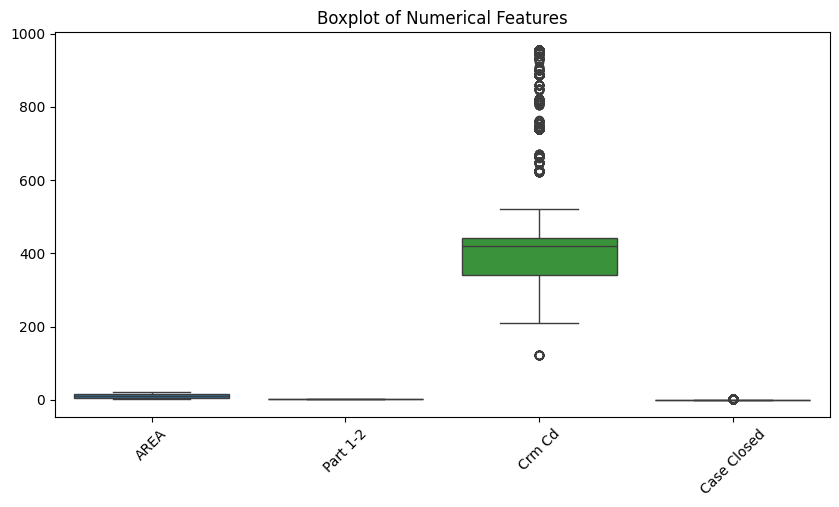

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45) 
plt.show()


In [22]:
correlation=df.corr(numeric_only=True)
correlation


,AREA,Part 1-2,Crm Cd,Case Closed
AREA,1.000000,0.028753,-0.044974,0.043942
Part 1-2,0.028753,1.000000,0.661003,0.046756
Crm Cd,-0.044974,0.661003,1.000000,0.089648
Case Closed,0.043942,0.046756,0.089648,1.000000


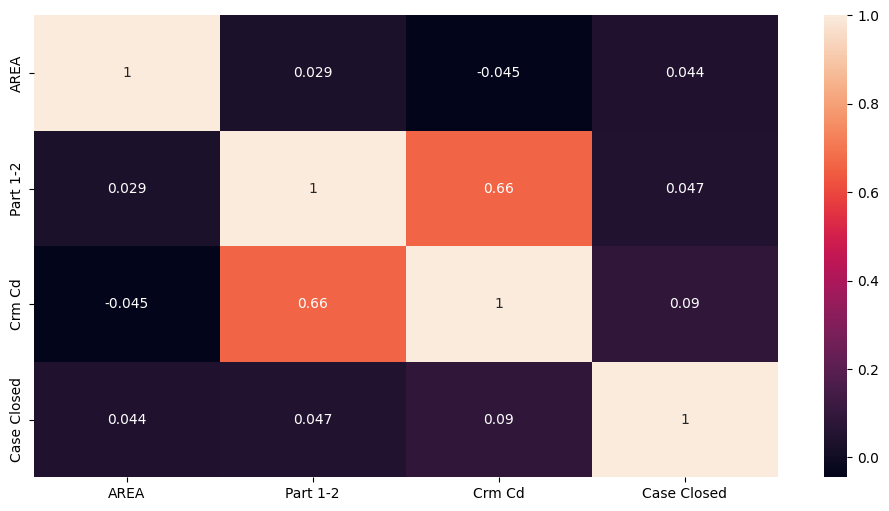

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [24]:
df.dtypes

AREA             int64
Part 1-2         int64
Crm Cd           int64
Crm Cd Desc     object
Mocodes         object
Vict Sex        object
Vict Descent    object
Premis Desc     object
LOCATION        object
Day of Week     object
Case Closed      int64
dtype: object

In [25]:
a=df['Vict Sex'].value_counts()
a

Vict Sex
M    6261
F    5124
X    2743
H       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Victim Sex')

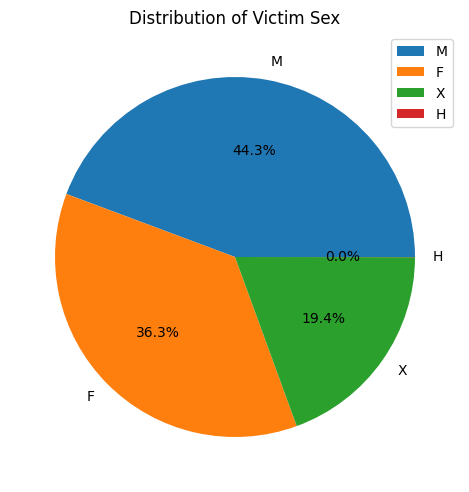

In [26]:
plt.pie(a.values,labels=a.index,autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.tight_layout()
plt.title("Distribution of Victim Sex")

In [27]:
df.drop(df.index[(df['Vict Sex']=='X')],axis=0,inplace=True)
df.drop(df.index[(df['Vict Sex']=='H')],axis=0,inplace=True)


In [28]:
df.reset_index(drop=True,inplace=True)
df.shape

(11385, 11)

In [29]:
b=df["Part 1-2"].value_counts()
b

Part 1-2
1    7829
2    3556
Name: count, dtype: int64

Text(0.5, 1.0, 'Part 1-2 Count graph')

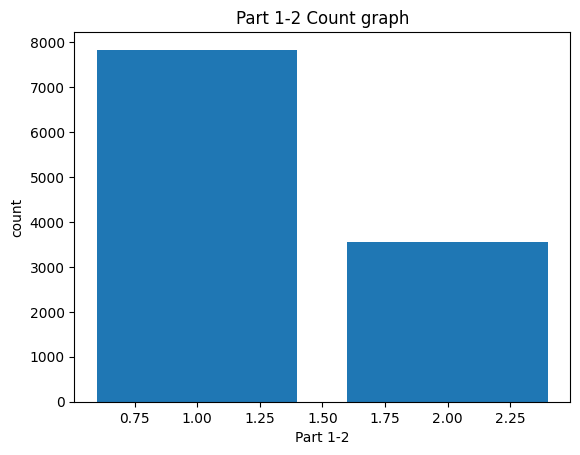

In [30]:
plt.bar(b.index,b.values)
plt.xlabel("Part 1-2")
plt.ylabel("count")
plt.title("Part 1-2 Count graph")

In [31]:
# # Encode categorical features
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Crm Cd Desc']=lab.fit_transform(df['Crm Cd Desc'])
df['Mocodes']=lab.fit_transform(df['Mocodes'])
df['Vict Sex']=lab.fit_transform(df['Vict Sex'])
df['Vict Descent']=lab.fit_transform(df['Vict Descent'])
df['Premis Desc']=lab.fit_transform(df['Premis Desc'])
df['LOCATION']=lab.fit_transform(df['LOCATION'])
df['Day of Week']=lab.fit_transform(df['Day of Week'])


In [32]:
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,7,1,210,55,413,1,6,20,5814,0,0
1,4,1,210,55,443,1,6,43,2666,5,0
2,19,2,850,40,1164,0,6,63,665,5,0
3,12,1,210,55,1561,1,6,69,4892,1,0
4,19,1,341,72,827,1,16,46,1386,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11380,11,1,341,72,1013,0,1,43,4289,1,0
11381,14,1,330,14,1750,1,11,99,6128,1,0
11382,1,1,440,70,856,0,6,107,28,6,0
11383,17,2,354,69,1369,1,16,134,6505,5,0


In [33]:
# --- Modeling --- #
X = df.drop(columns=['Case Closed'])
y = df['Case Closed']


In [34]:
# Train-test split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.25, random_state=42)
X_train

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week
323,15,2,354,69,947,1,16,134,4590,2
10733,8,2,745,76,275,0,0,115,1861,2
1097,4,1,331,66,413,0,6,115,5875,4
10057,13,2,812,24,1207,0,6,134,3491,1
1359,14,1,330,14,618,1,16,142,2574,6
...,...,...,...,...,...,...,...,...,...,...
11284,8,1,330,14,641,0,6,132,329,6
5191,9,1,440,70,696,0,16,31,1574,4
5390,5,2,662,11,92,1,11,163,1926,6
860,8,1,341,72,2293,1,11,2,498,0


In [35]:
print(X_train.dtypes)


AREA            int64
Part 1-2        int64
Crm Cd          int64
Crm Cd Desc     int64
Mocodes         int64
Vict Sex        int64
Vict Descent    int64
Premis Desc     int64
LOCATION        int64
Day of Week     int64
dtype: object


In [36]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)
X_train

array([[ 0.7153406 ,  1.47444149, -0.54784642, ...,  0.61333575,
         0.44042888, -0.48187464],
       [-0.40063555,  1.47444149,  1.73362516, ...,  0.141569  ,
        -0.88092155, -0.48187464],
       [-1.03833621, -0.67822291, -0.68205063, ...,  0.141569  ,
         1.0626111 ,  0.51672868],
       ...,
       [-0.87891105,  1.47444149,  1.24932301, ...,  1.3334008 ,
        -0.8494493 ,  1.515332  ],
       [-0.40063555, -0.67822291, -0.62370097, ..., -2.66420172,
        -1.54087048, -1.48047796],
       [-0.71948588, -0.67822291, -0.68788559, ...,  0.141569  ,
        -0.69015128,  1.01603034]], shape=(8538, 10))

In [ ]:
# Model Creation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2847,))

In [38]:
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,7,1,210,55,413,1,6,20,5814,0,0
1,4,1,210,55,443,1,6,43,2666,5,0
2,19,2,850,40,1164,0,6,63,665,5,0
3,12,1,210,55,1561,1,6,69,4892,1,0
4,19,1,341,72,827,1,16,46,1386,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11380,11,1,341,72,1013,0,1,43,4289,1,0
11381,14,1,330,14,1750,1,11,99,6128,1,0
11382,1,1,440,70,856,0,6,107,28,6,0
11383,17,2,354,69,1369,1,16,134,6505,5,0


In [39]:
print(knn.predict(scalar.transform([[1,2,180,56,414,0,9,24,6745,0]])))

[0]


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2762,    6],
       [  71,    8]])

In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9729539866526168

In [42]:
pd.set_option('display.max_columns',None)
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Case Closed
0,7,1,210,55,413,1,6,20,5814,0,0
1,4,1,210,55,443,1,6,43,2666,5,0
2,19,2,850,40,1164,0,6,63,665,5,0
3,12,1,210,55,1561,1,6,69,4892,1,0
4,19,1,341,72,827,1,16,46,1386,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11380,11,1,341,72,1013,0,1,43,4289,1,0
11381,14,1,330,14,1750,1,11,99,6128,1,0
11382,1,1,440,70,856,0,6,107,28,6,0
11383,17,2,354,69,1369,1,16,134,6505,5,0


In [43]:
df['Case Closed'].value_counts()

Case Closed
0    11051
1      334
Name: count, dtype: int64